# Lab 1 Analysis Example using Thicket

In [2]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [3]:
tk = th.Thicket.from_caliperreader(glob("mpi_cali_files/*.cali"))

In [4]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              12916389      1   
                                                  57113690      1   
                                                  104901785     1   
                                                  128917275     1   
                                                  145925778     1   
                                                  177017947     1   
                                                  188014081     1   
                                                  203927288     1   
                                                  220317578     1   
                                                  248328375     1   
                                                  252575726     1   
                                                  257589667     1   
                                                  278018841     1   
                                                  294354246     1   
                                                  318636133     1   
                                                  318662944     1   
                                                  341955067     1   
                                                  376299789     1   
                                                  404292190     1   
                                                  417548257     1   
                                                  428885473     1   
                                                  437986039     1   
                                                  471724274     1   
                                                  472794706     1   
                                                  542954575     1   
                                                  546592239     1   
                                                  554176977     1   
                                                  564992439     1   
                                                  573281731     1   
                                                  574744748     1   
                                                  577646634     1   
                                                  582833785     1   
                                                  600562066     1   
                                                  609953147     1   
                                                  621696533     1   
                                                  625396541     1   
                                                  642430487     1   
                                                  653604363     1   
                                                  661274665     1   
                                                  676273212     1   
                                                  766197685     1   
                                                  783564811     1   
                                                  794208079     1   
                                                  819439782     1   
                                                  841760824     1   
                                                  856218994     1   
                                                  884128419     1   
                                                  890019599     1   
                                                  895655611     1   
                                                  918746458     1   
                                                  942189991     1   
                                                  954215814     1   
                                                  964363372     1   
                                                  971819150     1   
                                                  983237604     1   
                                                  988890580     1   
                                                  1015336443

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [5]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
12916389             2.11.0-dev            1024   
57113690             2.11.0-dev             256   
104901785            2.11.0-dev             512   
128917275            2.11.0-dev            1024   
145925778            2.11.0-dev               2   
177017947            2.11.0-dev              32   
188014081            2.11.0-dev              16   
203927288            2.11.0-dev             256   
220317578            2.11.0-dev               2   
248328375            2.11.0-dev             512   
252575726            2.11.0-dev              16   
257589667            2.11.0-dev              16   
278018841            2.11.0-dev            1024   
294354246            2.11.0-dev               8   
318636133            2.11.0-dev              64   
318662944            2.11.0-dev               2   
341955067            2.11.0-dev             128   
376299789            2.11.0-dev              64   
404292190            2.11.0-dev               4   
417548257            2.11.0-dev             128   
428885473            2.11.0-dev              32   
437986039            2.11.0-dev             512   
471724274            2.11.0-dev               2   
472794706            2.11.0-dev            1024   
542954575            2.11.0-dev             512   
546592239            2.11.0-dev             128   
554176977            2.11.0-dev             512   
564992439            2.11.0-dev            1024   
573281731            2.11.0-dev            1024   
574744748            2.11.0-dev            1024   
577646634            2.11.0-dev              64   
582833785            2.11.0-dev               2   
600562066            2.11.0-dev               2   
609953147            2.11.0-dev               8   
621696533            2.11.0-dev               4   
625396541            2.11.0-dev              32   
642430487            2.11.0-dev              16   
653604363            2.11.0-dev               2   
661274665            2.11.0-dev              64   
676273212            2.11.0-dev             512   
766197685            2.11.0-dev             512   
783564811            2.11.0-dev              64   
794208079            2.11.0-dev              32   
819439782            2.11.0-dev              32   
841760824            2.11.0-dev               2   
856218994            2.11.0-dev             128   
884128419            2.11.0-dev            1024   
890019599            2.11.0-dev             512   
895655611            2.11.0-dev             128   
918746458            2.11.0-dev             256   
942189991            2.11.0-dev               4   
954215814            2.11.0-dev               8   
964363372            2.11.0-dev              64   
971819150            2.11.0-dev              32   
983237604            2.11.0-dev              16   
988890580            2.11.0-dev              16   
1015336443           2.11.0-dev              32   
1015892146           2.11.0-dev              16   
1072204380           2.11.0-dev              16   
1119728143           2.11.0-dev             512   
1120707742           2.11.0-dev             128   
1141627058           2.11.0-dev               8   
1146261783           2.11.0-dev               2   
1184638014           2.11.0-dev             128   
1208816846           2.11.0-dev               2   
1210689897           2.11.0-dev             128   
1225440378           2.11.0-dev               4   
1229938404           2.11.0-dev              16   
1245724572           2.11.0-dev             128   
1255778031           2.11.0-dev              16   
1264204019           2.11.0-dev             128   
1297545245           2.11.0-dev               4   
1316533462           2.11.0-dev             128   
1329923378           2.11.0-dev              16   
1334811407           2.11.0-dev             128   
1338170275           2.11.0-dev              16   
1352138530           2.11.0-dev  

In [16]:
gb = tk.groupby("matrix_size")
gb[128].dataframe

3  thickets created...
{128: <thicket.thicket.Thicket object at 0x2b7146054e50>, 1024: <thicket.thicket.Thicket object at 0x2b71460cf9d0>, 8192: <thicket.thicket.Thicket object at 0x2b7145fff190>}


nid  \
node                                               profile           
{'name': 'main', 'type': 'function'}               131652214     1   
                                                   810940663     1   
                                                   923564110     1   
                                                   1418801450    1   
                                                   1849218310    1   
                                                   3336543573    1   
{'name': 'whole_computation', 'type': 'function'}  131652214     2   
                                                   810940663     2   
                                                   923564110     2   
                                                   1418801450    2   
                                                   1849218310    2   
                                                   3336543573    2   
{'name': 'master_initialization', 'type': 'func... 131652214     3   
                                                   810940663     3   
                                                   923564110     3   
                                                   1418801450    3   
                                                   1849218310    3   
                                                   3336543573    3   
{'name': 'master_send_recieve', 'type': 'functi... 131652214     4   
                                                   810940663     4   
                                                   923564110     4   
                                                   1418801450    4   
                                                   1849218310    4   
                                                   3336543573    4   
{'name': 'worker_calculation', 'type': 'function'} 131652214     6   
                                                   810940663     6   
                                                   923564110     6   
                                                   1418801450    6   
                                                   1849218310    6   
                                                   3336543573    6   
{'name': 'worker_recieve', 'type': 'function'}     131652214     5   
                                                   810940663     5   
                                                   923564110     5   
                                                   1418801450    5   
                                                   1849218310    5   
                                                   3336543573    5   
{'name': 'worker_send', 'type': 'function'}        131652214     7   
                                                   810940663     7   
                                                   923564110     7   
                                                   1418801450    7   
                                                   1849218310    7   
                                                   3336543573    7   

                                                                spot.channel  \
node                                               profile                     
{'name': 'main', 'type': 'function'}               131652214   regionprofile   
                                                   810940663   regionprofile   
                                                   923564110   regionprofile   
                                                   1418801450  regionprofile   
                                                   1849218310  regionprofile   
                                                   3336543573  regionprofile   
{'name': 'whole_computation', 'type': 'function'}  131652214   regionprofile   
                                                   810940663   regionprofile   
                                                   923564110   regionprofile   
                                                   1418801450  regionprofile   
                      

Compose these 3 groups column-wise to get a holistic view of the data

In [17]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [18]:
ctk.dataframe

128  \
                                                             nid   
node                                               num_procs       
{'name': 'main', 'type': 'function'}               2           1   
                                                   4           1   
                                                   8           1   
                                                   16          1   
                                                   32          1   
                                                   64          1   
{'name': 'whole_computation', 'type': 'function'}  2           2   
                                                   4           2   
                                                   8           2   
                                                   16          2   
                                                   32          2   
                                                   64          2   
{'name': 'master_initialization', 'type': 'func... 2           3   
                                                   4           3   
                                                   8           3   
                                                   16          3   
                                                   32          3   
                                                   64          3   
{'name': 'master_send_recieve', 'type': 'functi... 2           4   
                                                   4           4   
                                                   8           4   
                                                   16          4   
                                                   32          4   
                                                   64          4   
{'name': 'worker_calculation', 'type': 'function'} 2           6   
                                                   4           6   
                                                   8           6   
                                                   16          6   
                                                   32          6   
                                                   64          6   
{'name': 'worker_recieve', 'type': 'function'}     2           5   
                                                   4           5   
                                                   8           5   
                                                   16          5   
                                                   32          5   
                                                   64          5   
{'name': 'worker_send', 'type': 'function'}        2           7   
                                                   4           7   
                                                   8           7   
                                                   16          7   
                                                   32          7   
                                                   64          7   

                                                                             \
                                                               spot.channel   
node                                               num_procs                  
{'name': 'main', 'type': 'function'}               2          regionprofile   
                                                   4          regionprofile   
                                                   8          regionprofile   
                                                   16         regionprofile   
                                                   32         regionprofile   
                                                   64         regionprofile   
{'name': 'whole_computation', 'type': 'function'}  2          regionprofile   
                                                   4          regionprofile   
                                                   8          regionprofile   
                                                   1

Perform pandas operations to get the table in a desirable format for plotting

In [19]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (128, "nid"), (128, "spot.channel"), (1024, "nid"), (1024, "spot.channel"), (8192, "nid"), (8192, "spot.channel")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

#gb[128].dataframe = gb[128].dataframe.reset_index().drop([("node", ""), ("profile", ""), ("nid", ""), ("spot.channel", "")], axis=1)
# Rename index to remove tuple
#gb[128].dataframe = gb[128].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

#matrices = ctk.groupby("matrix_size")

In [20]:
ctk.dataframe

128                              \
                                Min time/rank Max time/rank Avg time/rank   
name                  num_procs                                             
main                  2              0.361193      0.363659      0.362426   
                      4              0.452654      0.452919      0.452734   
                      8              0.408449      0.422321      0.415583   
                      16             0.464882      0.500889      0.487711   
                      32             0.664331      0.710481      0.676241   
                      64             0.518508      0.547352      0.534601   
whole_computation     2              0.017381      0.017514      0.017447   
                      4              0.017369      0.021009      0.020085   
                      8              0.007375      0.013583      0.008374   
                      16             0.006489      0.025113      0.008085   
                      32             0.006192      0.045413      0.008453   
                      64             0.005937      0.025130      0.006825   
master_initialization 2              0.000253      0.000253      0.000253   
                      4              0.000243      0.000243      0.000243   
                      8              0.000242      0.000242      0.000242   
                      16             0.000251      0.000251      0.000251   
                      32             0.000358      0.000358      0.000358   
                      64             0.000242      0.000242      0.000242   
master_send_recieve   2              0.010941      0.010941      0.010941   
                      4              0.011197      0.011197      0.011197   
                      8              0.007236      0.007236      0.007236   
                      16             0.018673      0.018673      0.018673   
                      32             0.039003      0.039003      0.039003   
                      64             0.018953      0.018953      0.018953   
worker_calculation    2              0.010470      0.010470      0.010470   
                      4              0.003267      0.003341      0.003314   
                      8              0.001391      0.001475      0.001418   
                      16             0.000629      0.000712      0.000670   
                      32             0.000316      0.000401      0.000329   
                      64             0.000161      0.000247      0.000167   
worker_recieve        2              0.000870      0.000870      0.000870   
                      4              0.011893      0.011952      0.011927   
                      8              0.000181      0.000458      0.000363   
                      16             0.000142      0.002422      0.000569   
                      32             0.000150      0.000946      0.000594   
                      64             0.000113      0.000158      0.000124   
worker_send           2              0.000045      0.000045      0.000045   
                      4              0.000026      0.000030      0.000028   
                      8              0.000021      0.000037      0.000027   
                      16             0.000018      0.000031      0.000022   
                      32             0.000018      0.000973      0.000662   
                      64             0.000015      0.002395      0.000563   

                                                    1024                \
                                Total time Min time/rank Max time/rank   
name                  num_procs                                          
main                  2           0.724852     10.636708     10.637166   
                      4           1.810936      3.671994      3.858654   
                      8           3.324665      1.823461      2.014734   
                      16          7.803373      1.122673      1.276205   
                      32         21.639714      0.810933  

In [24]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_procs = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())
matrix_sizes

[(128, 'Avg time/rank'),
 (128, 'Max time/rank'),
 (128, 'Min time/rank'),
 (128, 'Total time'),
 (1024, 'Avg time/rank'),
 (1024, 'Max time/rank'),
 (1024, 'Min time/rank'),
 (1024, 'Total time'),
 (8192, 'Avg time/rank'),
 (8192, 'Max time/rank'),
 (8192, 'Min time/rank'),
 (8192, 'Total time')]

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [19]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [31]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(['Min time/rank', 'Max time/rank', 'Avg time/rank', 'Total time'])
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(num_procs)
    plt.show()
    return fig, ax

# Examples

## time

In [26]:
ctk.dataframe.loc["main"][8192]

Min time/rank  Max time/rank  Avg time/rank    Total time
num_procs                                                           
2           14782.117990   14782.198173   14782.158081  29564.316163
4            4801.291646    4853.602450    4835.226580  19340.906318
8            2258.511884    2288.477439    2283.887322  18271.098577
16           1030.027679    1046.157279    1044.473899  16711.582386
32            471.240773     524.367461     503.932331  16125.834591
64            245.483125     255.765275     253.623564  16231.908117

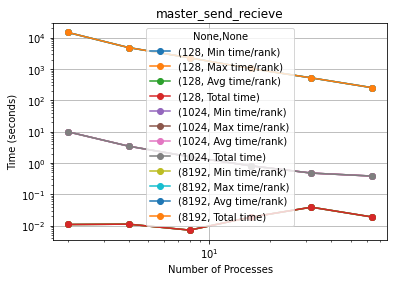

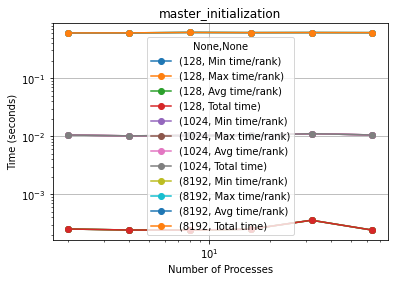

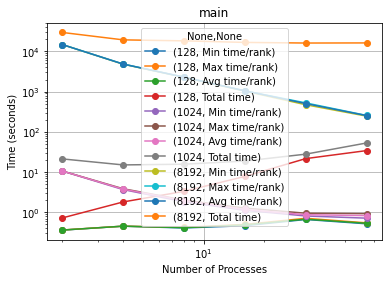

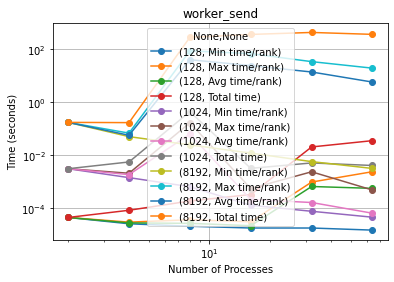

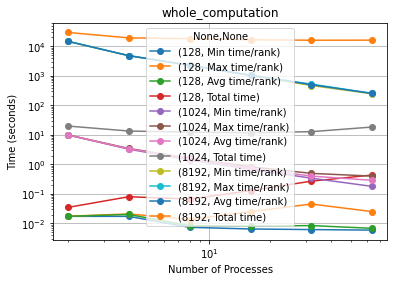

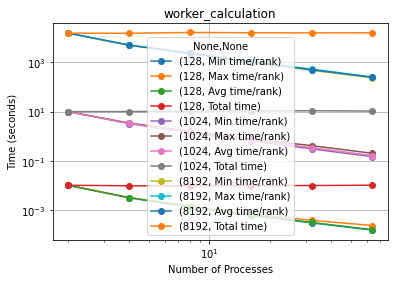

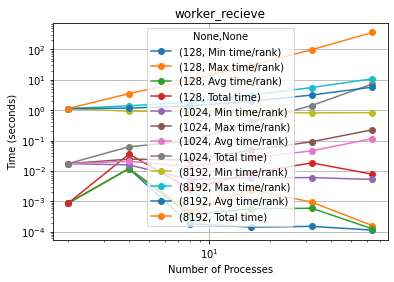

In [73]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

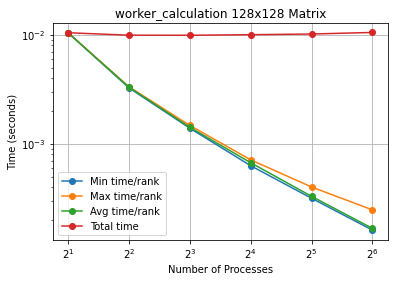

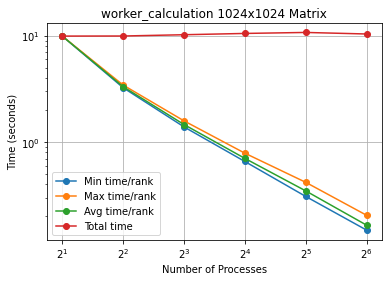

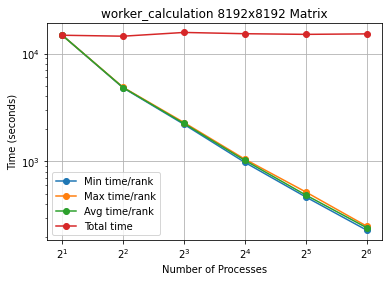

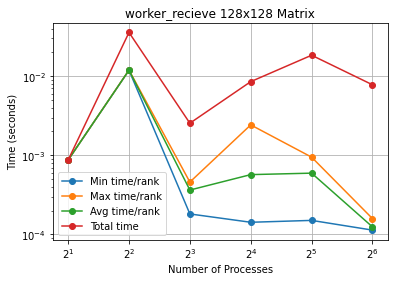

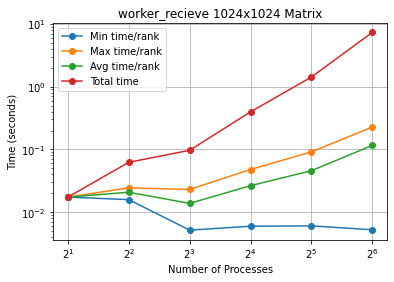

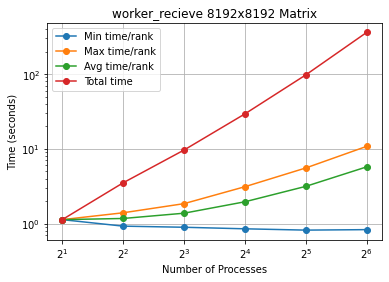

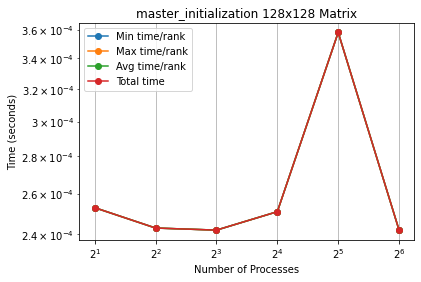

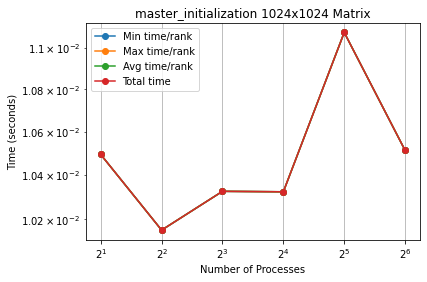

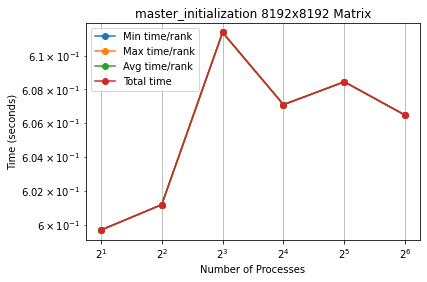

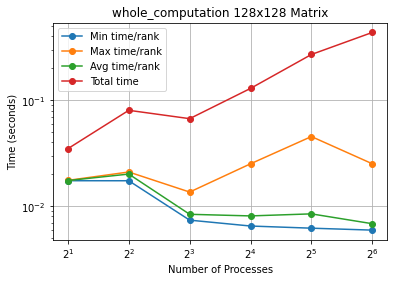

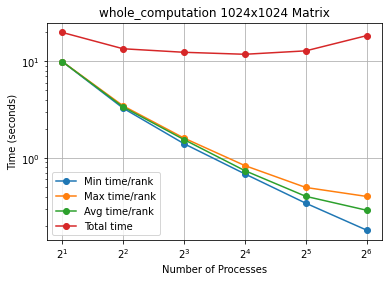

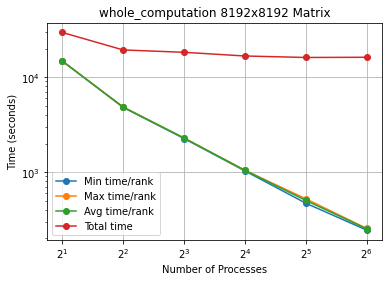

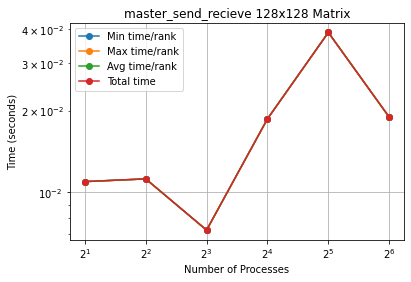

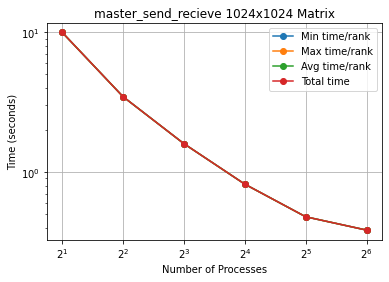

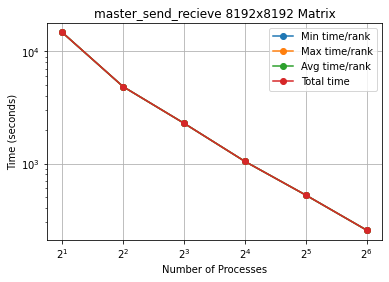

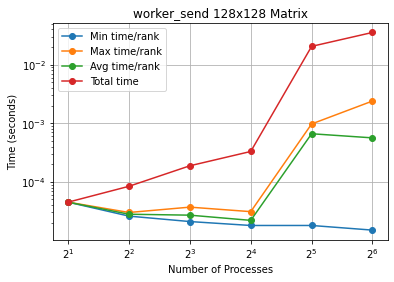

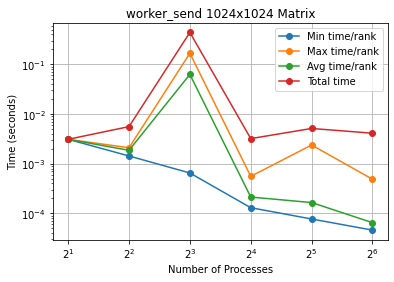

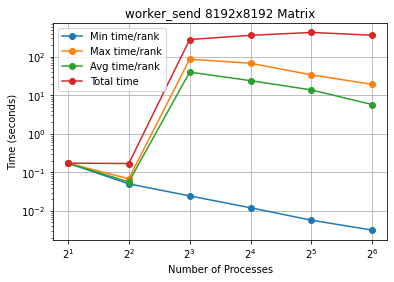

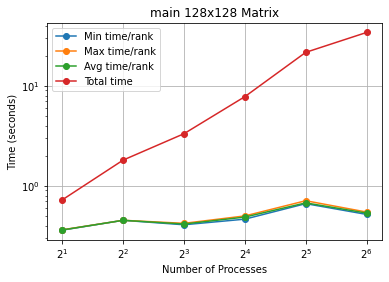

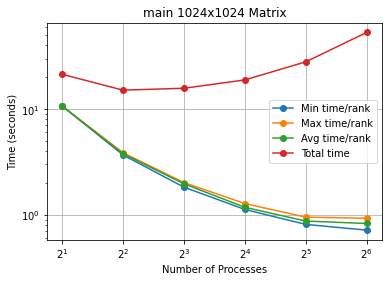

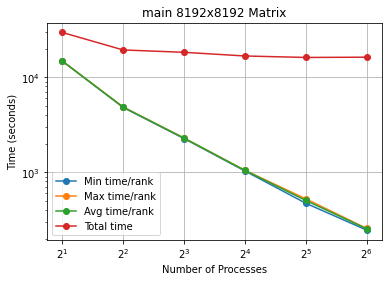

In [32]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name][128],
        title=name + " 128x128 Matrix",
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
    )
    plot_mpl(
        df=ctk.dataframe.loc[name][1024],
        title=name + " 1024x1024 Matrix",
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
    )
    plot_mpl(
        df=ctk.dataframe.loc[name][8192],
        title=name + " 8192x8192 Matrix",
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
    )

## Speedup

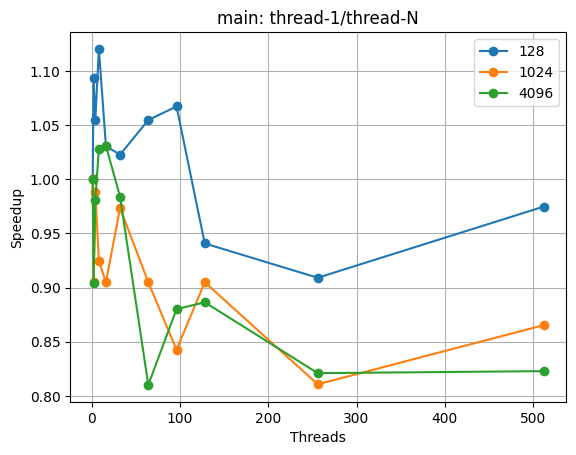

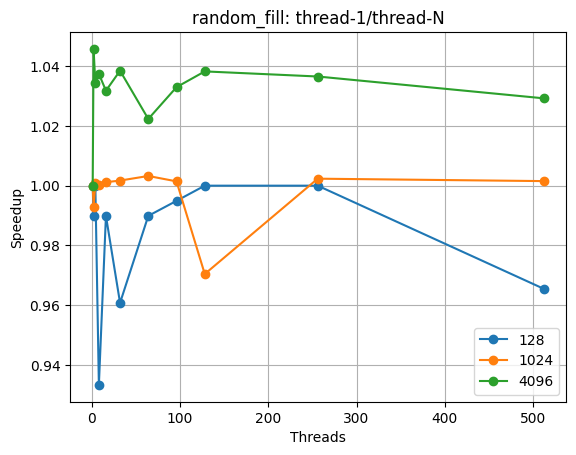

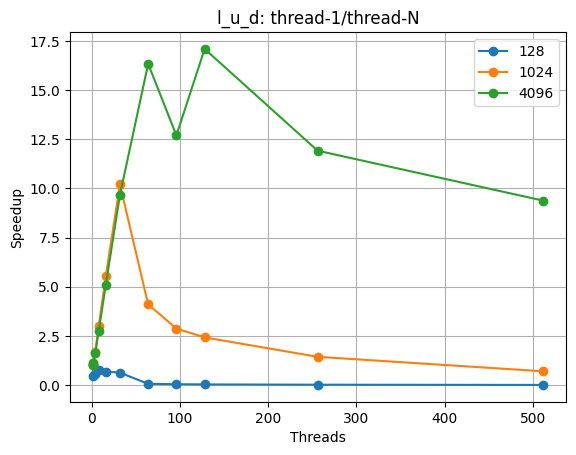

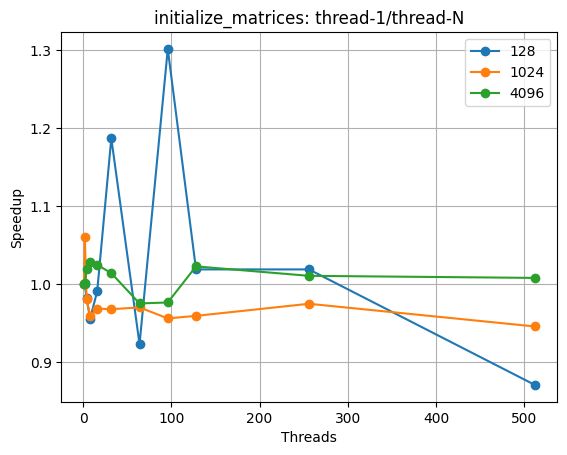

In [16]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name][128],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )